# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/cherry-leaves/train",
    label_mode="categorical",
    class_names=['healthy','powdery_mildew'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/cherry-leaves/test",
    label_mode="categorical",
    class_names=['healthy','powdery_mildew'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 4205 files belonging to 2 classes.
==========================Validation Data====================
Found 1574 files belonging to 2 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/cherry-leaves/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/cherry-leaves/test",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 4205 images belonging to 2 classes.
Found 1574 images belonging to 2 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Cherry Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 15s 118ms/step - loss: 4.5160e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.045160%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 43ms/step


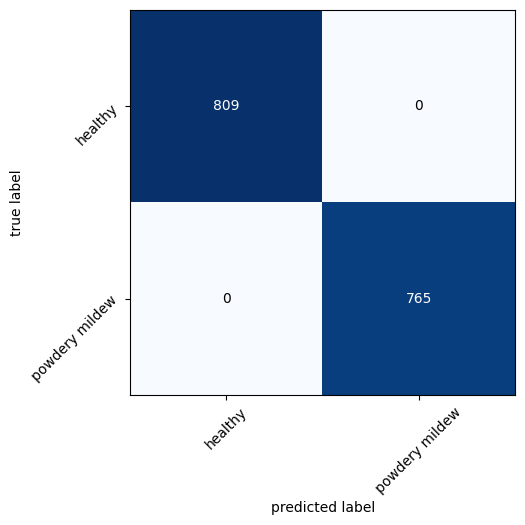

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [6]:
# Confusion Matrix and Classification Report
target_names = ['healthy','powdery mildew']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_dense_non_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_dense_non_aug1)

## Model Dense121 Version 2 Cherry Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 5s 48ms/step - loss: 2.6244e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.002624%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 43ms/step


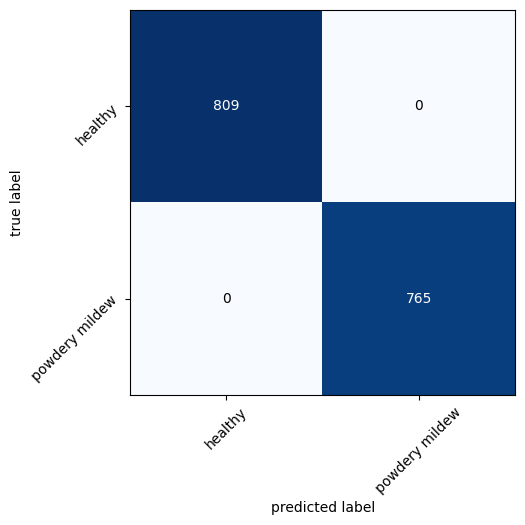

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_dense_non_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_dense_non_aug2)

## MobileNet V2 Version 1 Cherry Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 3s 27ms/step - loss: 3.1272e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.003127%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 23ms/step


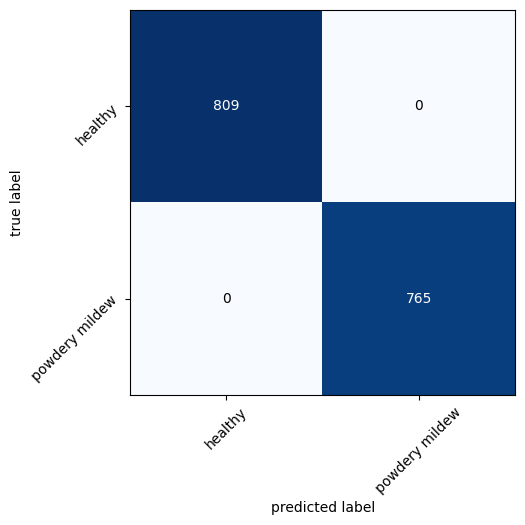

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_mobile_non_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_mobile_non_aug1)

## MobileNet V2 Version 2 Cherry Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 3s 23ms/step - loss: 2.7789e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.027789%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 22ms/step


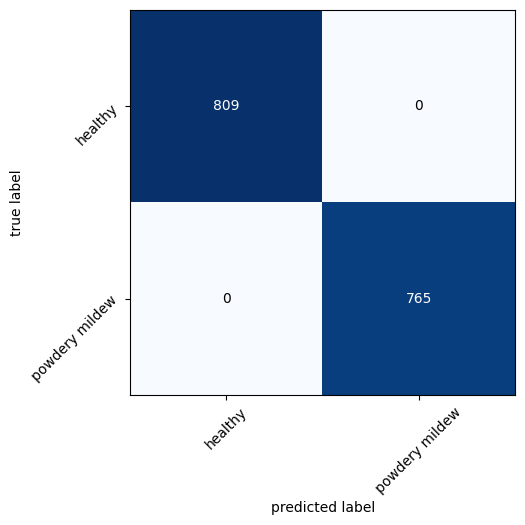

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_mobile_non_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_mobile_non_aug2)

## DIY Version 1 Cherry Non Augmented

In [16]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_DIY_model1_Based_Non_Augmented')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 2s 23ms/step - loss: 0.0042 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.420184%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 23ms/step


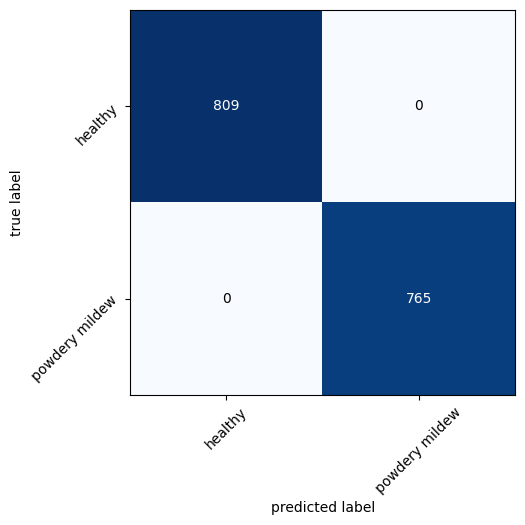

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_diy_non_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_diy_non_aug1)

## DIY Version 2 Cherry Non Augmented

In [19]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_DIY_model2_Based_Non_Augmented')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 2s 22ms/step - loss: 6.9312e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.069312%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 20ms/step


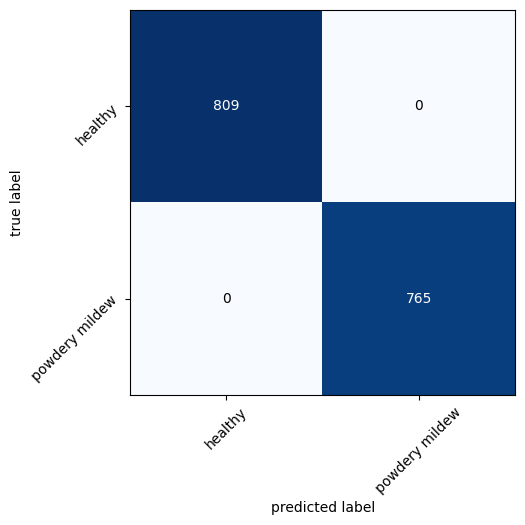

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_diy_non_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_diy_non_aug2)

## Xception Version 1 Cherry Non Augmented

In [22]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 6s 60ms/step - loss: 1.9610e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.019610%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 54ms/step


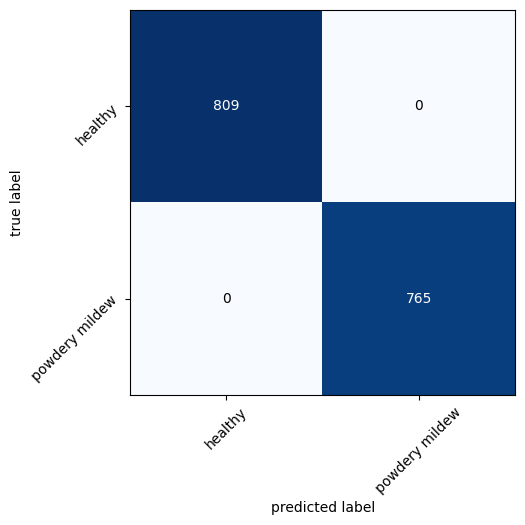

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [24]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_xception_non_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_xception_non_aug1)

## Xception Version 2 Cherry Non Augmented

In [25]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Cherry-Leaves/Non Augmented/Saved Model/Cherry_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 6s 56ms/step - loss: 9.2059e-07 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.000092%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 53ms/step


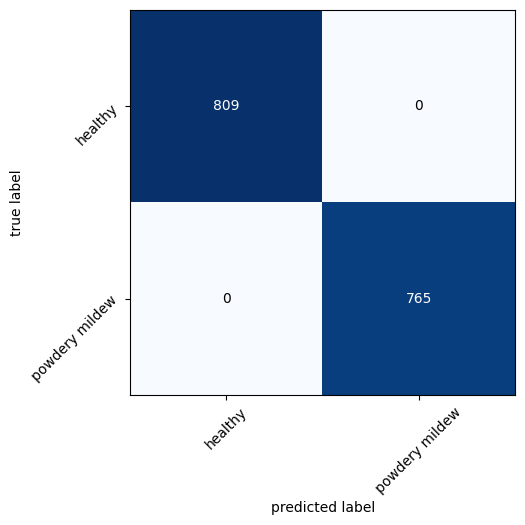

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [27]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_xception_non_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_xception_non_aug2)

# Model Augmented Evaluating

## Model Dense121 Version 1 Cherry Augmented

In [28]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_DenseNet_model1_Based_Augmented')

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 6s 51ms/step - loss: 4.3144e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.043144%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 43ms/step


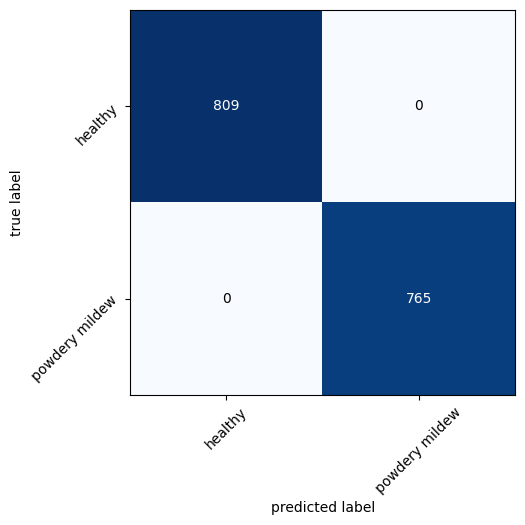

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [30]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_dense_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_dense_aug1)

## Model Dense121 Version 2 Cherry Augmented

In [31]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_DenseNet_model2_Based_Augmented')

In [32]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 5s 47ms/step - loss: 0.0019 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.191200%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 44ms/step


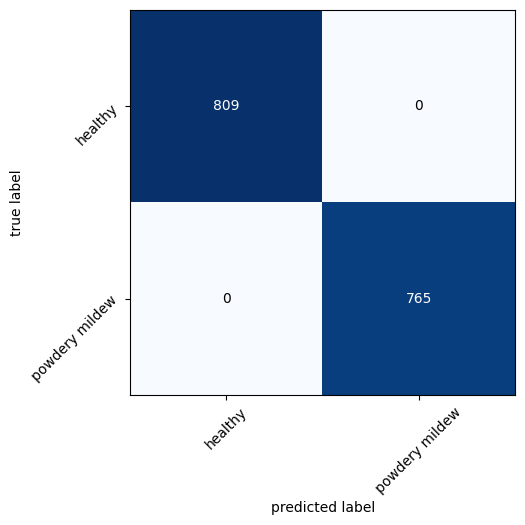

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [33]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_dense_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_dense_aug2)

## MobileNet V2 Version 1 Cherry Non Augmented

In [34]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_MobileNetV2_model1_Based_Augmented')

In [35]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 3s 25ms/step - loss: 6.6280e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.006628%


==========================Confusion Matrix====================
79/79 [==============================] - 3s 32ms/step


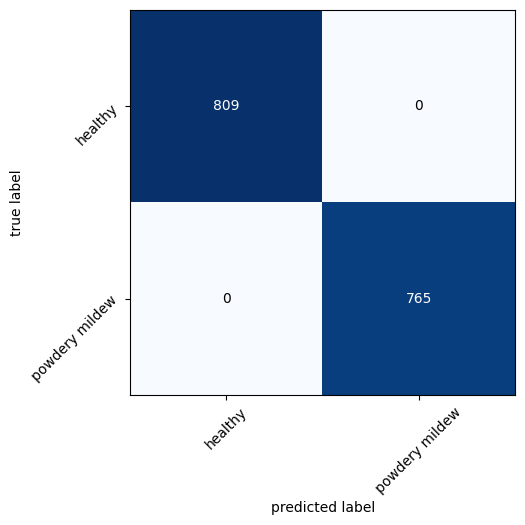

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [36]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_mobile_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_mobile_aug1)

## MobileNet V2 Version 2 Cherry Non Augmented

In [37]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_MobileNetV2_model2_Based_Augmented')

In [38]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 3s 24ms/step - loss: 2.7204e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.027204%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 25ms/step


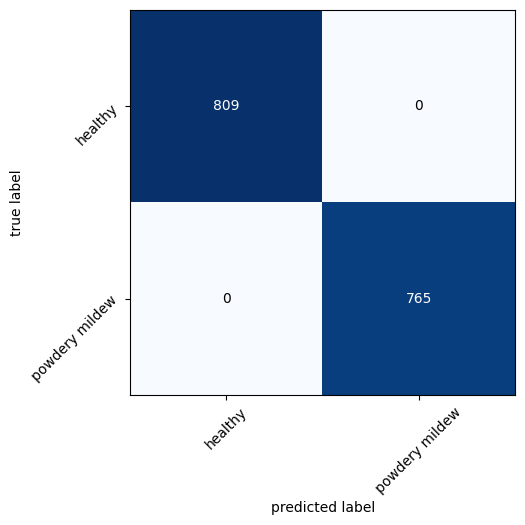

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [39]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_mobile_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_mobile_aug2)

## Xception Version 1 Cherry Augmented

In [40]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 6s 57ms/step - loss: 4.9120e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.004912%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 53ms/step


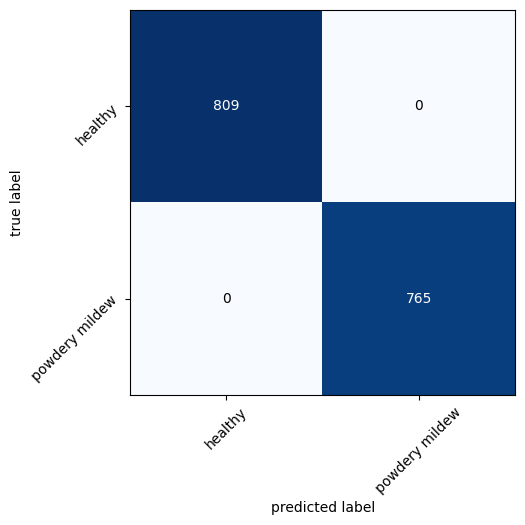

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [42]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_xception_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_xception_aug1)

## Xception Version 2 Cherry Augmented

In [43]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 6s 57ms/step - loss: 6.7279e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.006728%


==========================Confusion Matrix====================
79/79 [==============================] - 5s 54ms/step


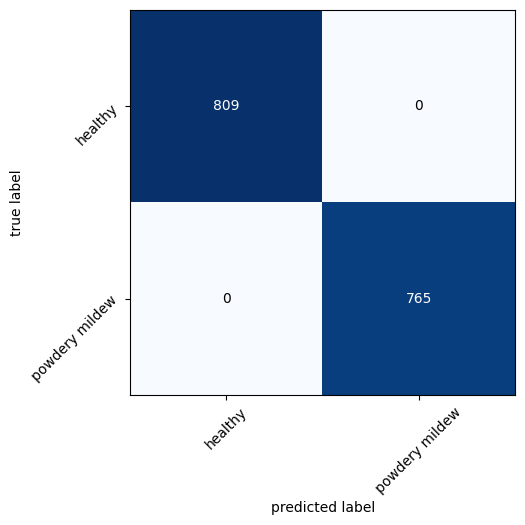

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [45]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_xception_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_xception_aug2)

## DIY Version 1 Cherry Augmented

In [46]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_DIY_model1_Based_Augmented')

In [47]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 2s 20ms/step - loss: 5.7386e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.057386%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 20ms/step


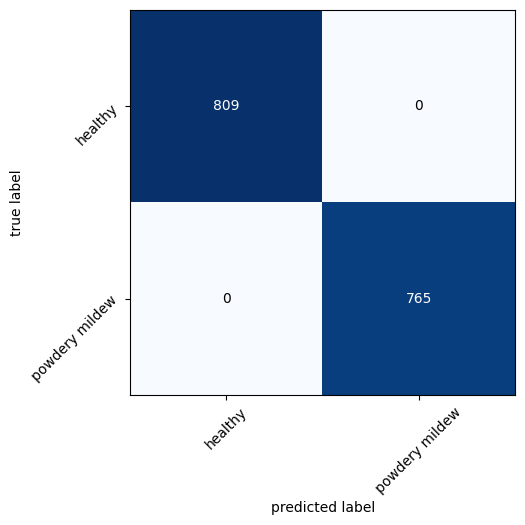

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  1.0


In [48]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_diy_aug1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_diy_aug1)

## DIY Version 2 Cherry Augmented

In [49]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Cherry-Leaves/Augmented/Saved Model/Cherry_DIY_model2_Based_Augmented')

In [50]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
79/79 [==============================] - 2s 20ms/step - loss: 0.0028 - accuracy: 0.9994
Accuracy: 99.936467%
Loss: 0.280643%


==========================Confusion Matrix====================
79/79 [==============================] - 2s 20ms/step


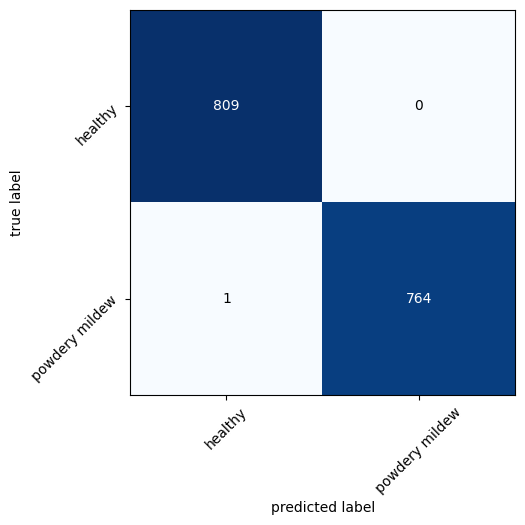

==========================Classification Report====================
Classification Report
                precision    recall  f1-score   support

       healthy       1.00      1.00      1.00       809
powdery mildew       1.00      1.00      1.00       765

      accuracy                           1.00      1574
     macro avg       1.00      1.00      1.00      1574
  weighted avg       1.00      1.00      1.00      1574

==========================F1 Score====================
F1 Score :  0.9993646644355112


In [51]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_cherry_diy_aug2 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_cherry_diy_aug2)

# Compare All

In [52]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

f1 = {
    "Dense_Non_Aug1": f1_cherry_dense_non_aug1,
    "Dense_Non_Aug2": f1_cherry_dense_non_aug2,
    "Mobile_Non_Aug1": f1_cherry_mobile_non_aug1,
    "Mobile_Non_Aug2": f1_cherry_mobile_non_aug2,
    "DIY_Non_Aug1": f1_cherry_diy_non_aug1,
    "DIY_Non_Aug2": f1_cherry_diy_non_aug2,
    "Xception_Non_Aug1": f1_cherry_xception_non_aug1,
    "Xception_Non_Aug2": f1_cherry_xception_non_aug2,
    "Dense_Aug1": f1_cherry_dense_aug1,
    "Dense_Aug2": f1_cherry_dense_aug2,
    "Mobile_Aug1": f1_cherry_mobile_aug1,
    "Mobile_Aug2": f1_cherry_mobile_aug2,
    "Xception_Aug1": f1_cherry_xception_aug1,
    "Xception_Aug2": f1_cherry_xception_aug2,
    "DIY_Aug1": f1_cherry_diy_aug1,
    "DIY_Aug2": f1_cherry_diy_aug2
}

# Make dataframe of all models, accuracy, loss, and f1 score
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy          Loss        F1
0      Dense_Non_Aug1  1.000000  4.516003e-04  1.000000
1      Dense_Non_Aug2  1.000000  2.624389e-05  1.000000
2     Mobile_Non_Aug1  1.000000  3.127192e-05  1.000000
3     Mobile_Non_Aug2  1.000000  2.778946e-04  1.000000
4        DIY_Non_Aug1  1.000000  4.201843e-03  1.000000
5        DIY_Non_Aug2  1.000000  6.931162e-04  1.000000
6   Xception_Non_Aug1  1.000000  1.961001e-04  1.000000
7   Xception_Non_Aug2  1.000000  9.205923e-07  1.000000
8          Dense_Aug1  1.000000  4.314446e-04  1.000000
9          Dense_Aug2  1.000000  1.912002e-03  1.000000
10        Mobile_Aug1  1.000000  6.627980e-05  1.000000
11        Mobile_Aug2  1.000000  2.720430e-04  1.000000
12      Xception_Aug1  1.000000  4.911976e-05  1.000000
13      Xception_Aug2  1.000000  6.727901e-05  1.000000
14           DIY_Aug1  1.000000  5.738626e-04  1.000000
15           DIY_Aug2  0.999365  2.806427e-03  0.999365


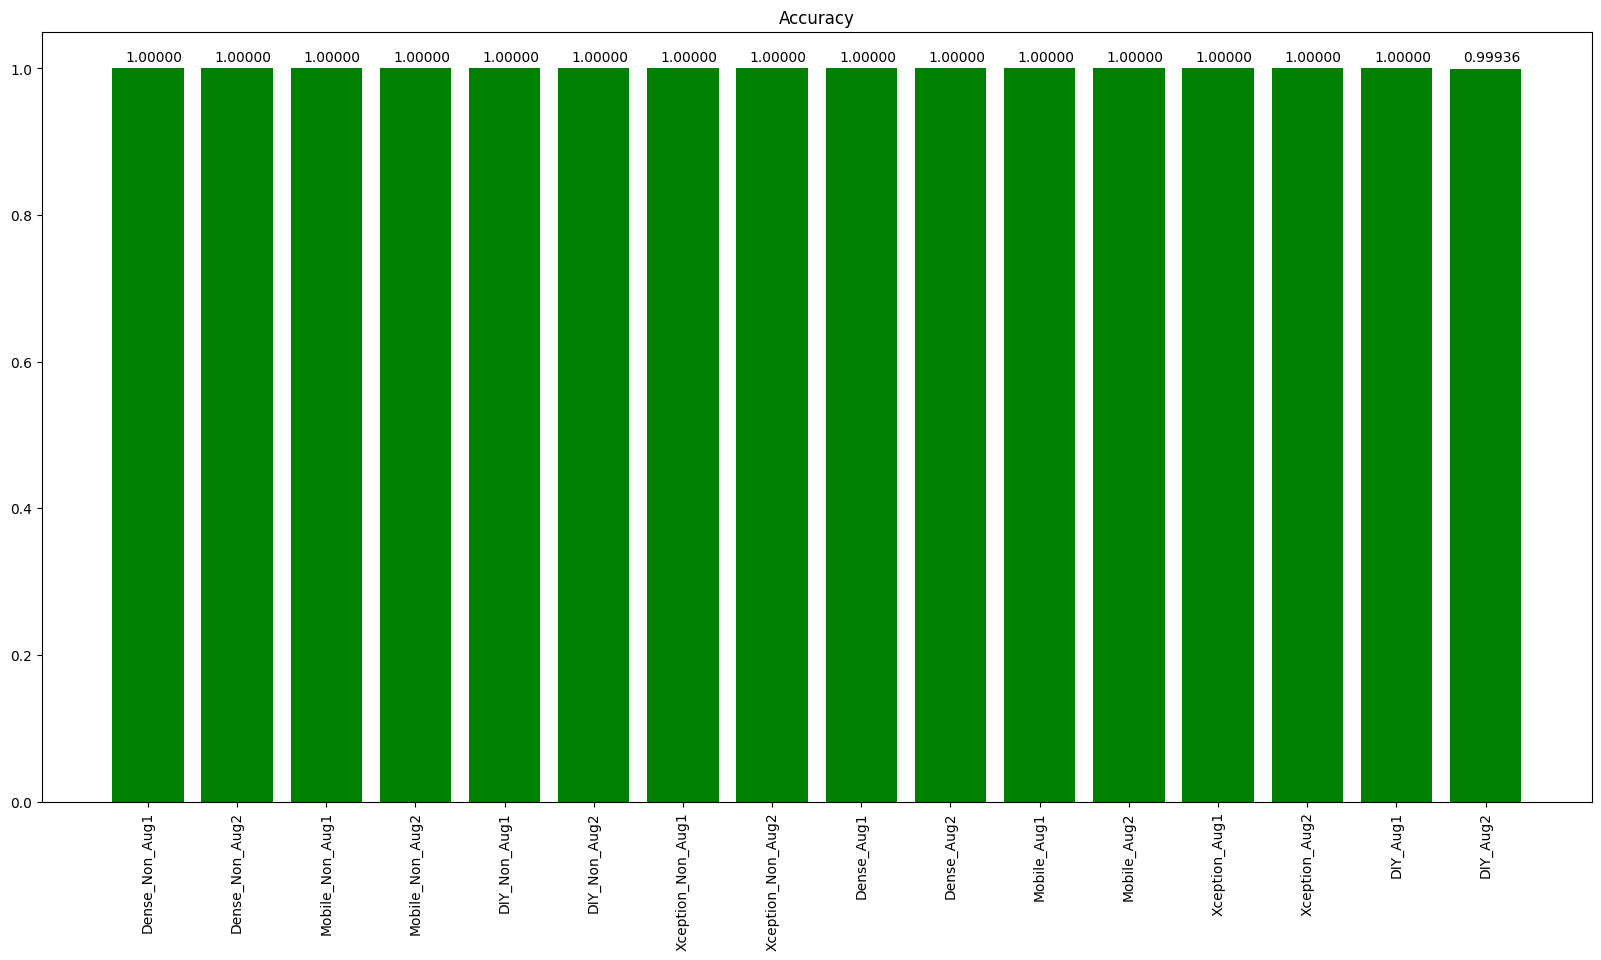

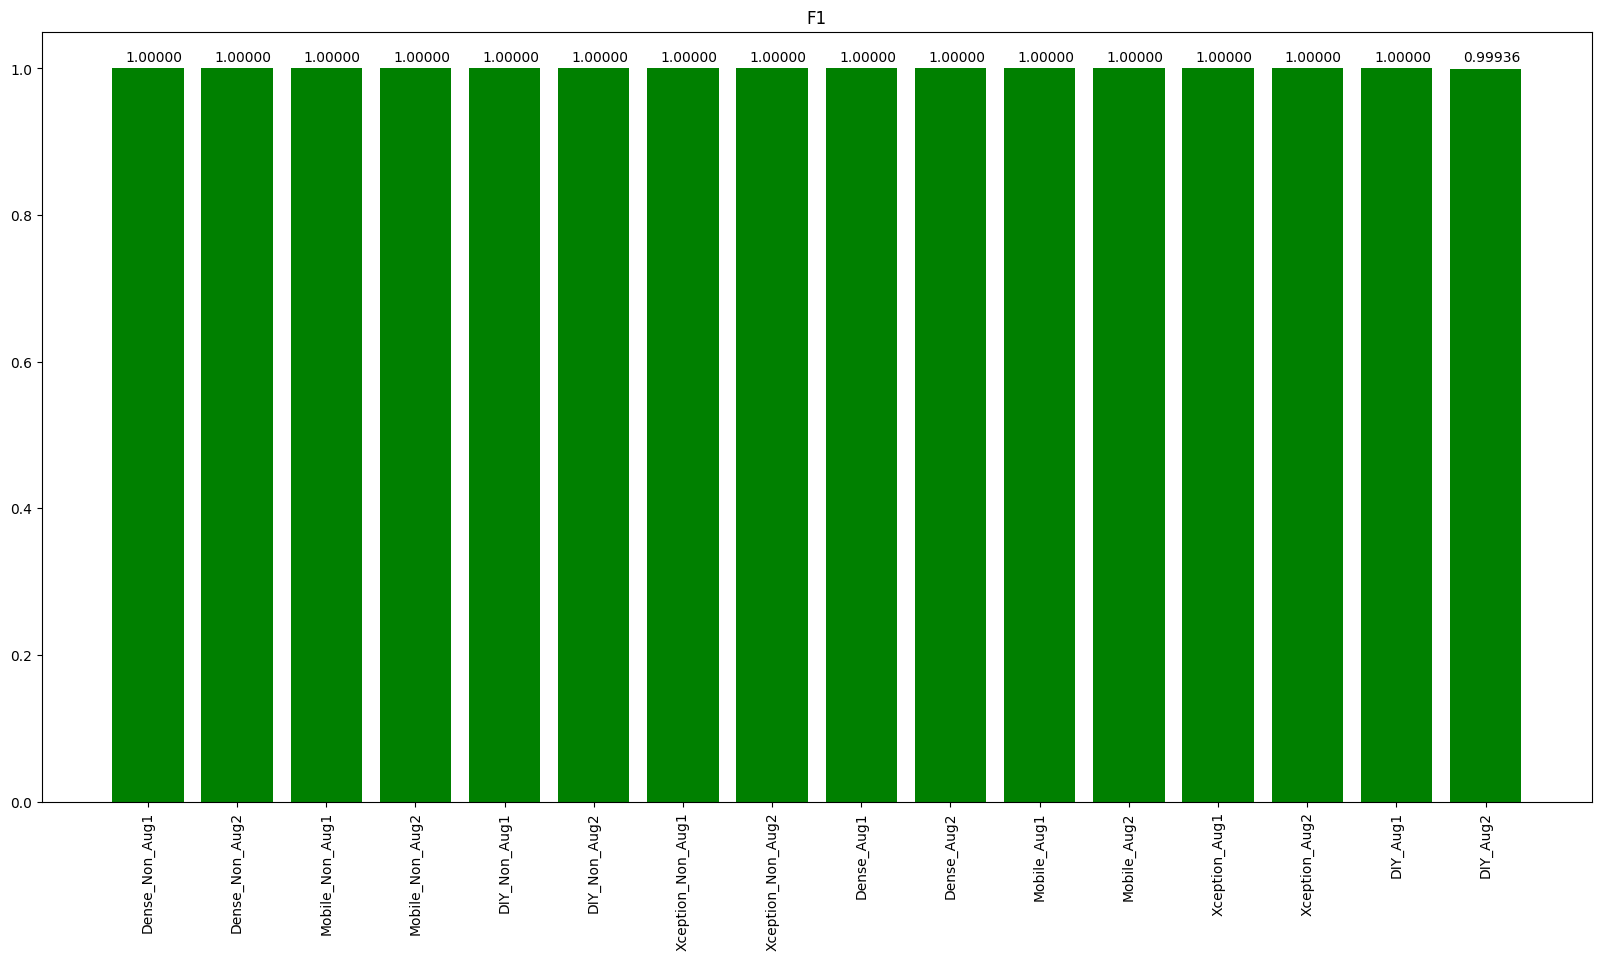

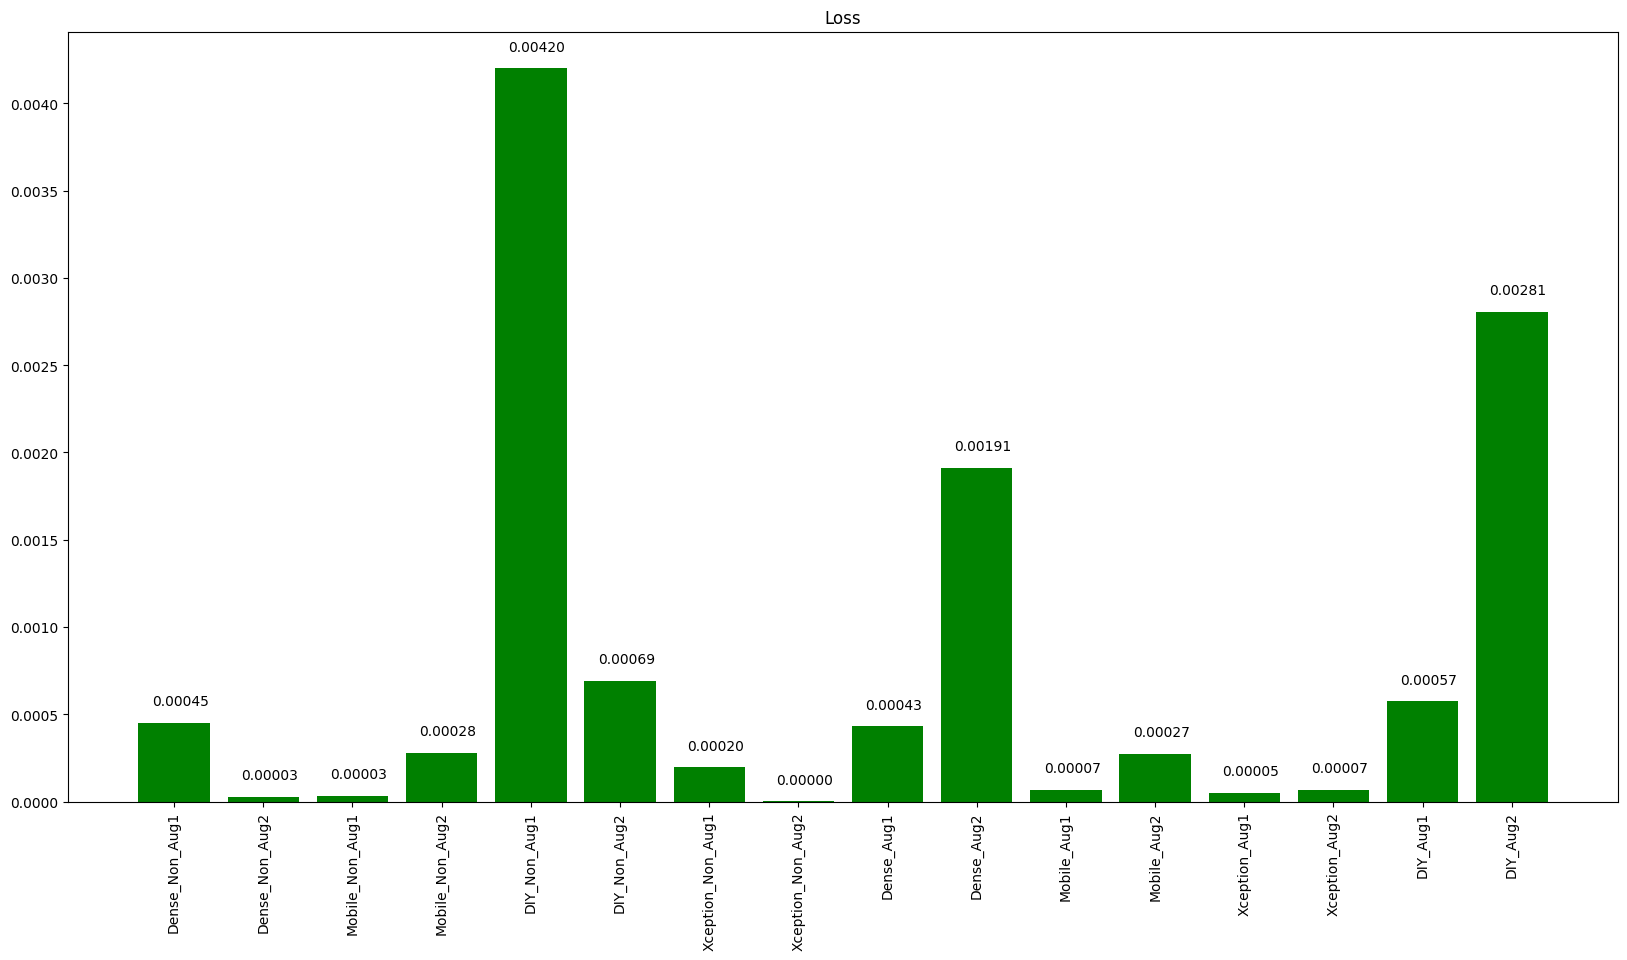

In [67]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(20, 10))
plt.title('Accuracy')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# F1
plt.figure(figsize=(20, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# Loss
plt.figure(figsize=(20, 10))
plt.title('Loss')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0001, '{0:.5f}'.format(v))
plt.show()